Hussein Maatouk 5626766


In this project, we aim to create a 5x5 grid world environment where an agent navigates towards an exit while maximizing its cumulative rewards. The grid world follows a greedy approach, where the agent makes decisions based on immediate rewards. The agent starts at position (4, 4), and the exit is located at (0, 0).

In this environment, the agent has four available actions: up, down, left, and right. The agent receives a reward of -1 for each action in any state except for the exit state, where it receives a reward of 50.
But later I will be changing the reward distribution in order to see their effect on the optimal policy

We will employ two reinforcement learning algorithms, Q-learning and SARSA, to find the optimal policy. The agent will learn by exploring the environment, updating Q-values based on observed rewards, and selecting actions that maximize cumulative rewards.

Through the implementation of Q-learning and SARSA, we will compare their performance in terms of total cumulative rewards and convergence to the optimal policy. This project aims to provide insights into the effectiveness of these algorithms in a greedy environment, where the agent's goal is to maximize rewards while reaching the exit.


In [1]:
import numpy as np

class GreedyEnvironment:
    def __init__(self, size=5, initial_position=(4, 4)):
        self.size = size
        self.state = None
        self.actions = ['up', 'down', 'left', 'right']  # Added 'exit' to the list of actions
        self.rewards = {'exit': 50, 'default': -1}
        self.reset(initial_position)
        self.current_position = initial_position
        self.custom_rewards = {}  # Custom rewards for specific states

    def reset(self, initial_position=None):
        if initial_position is None:
            self.state = (self.size - 1, self.size - 1)  # Starting state at bottom-right corner
        else:
            if not self.is_valid_position(initial_position):
                raise ValueError('Invalid initial position.')
            self.state = initial_position
        return self.state

    def step(self, action):
        row, col = self.state
        reward = self.rewards['default']
        done = False

        if action == 'up' or action == 0:
            if row > 0:
                if row==1 and col==0:
                  reward=self.rewards['exit']
                  row -= 1
                  done= True
                else: row -= 1
        elif action == 'down' or action == 1:
            if row < self.size - 1:
                row += 1
        elif action == 'left' or action == 2:
            if col > 0:
                if col==1 and row==0:
                  reward=self.rewards['exit']
                  col -= 1
                  done = True
                else : col -= 1
        elif action == 'right' or action == 3:
            if col < self.size - 1:
                col += 1

        self.state = (row, col)

        if self.state in self.custom_rewards:
            reward = self.custom_rewards[self.state]

        return self.state, reward, done

    def render(self):
        grid = np.zeros((self.size, self.size), dtype=str)
        grid[self.state] = 'X'  # Mark current state with 'X'
        for row in grid:
            print(' | '.join(row))
            print('-' * (4 * self.size - 1))

    def is_valid_position(self, position):
        row, col = position
        if 0 <= row < self.size and 0 <= col < self.size:
            return True
        else:
            return False

    def is_terminal(self, state):
        row, col = state
        if col == 0 and row == 0:
            return True
        else:
            return False

    def is_valid_action(self, action, state):
        row, col = self.state
        if row > 0 and (action == "up" or action == 0):
            return True
        elif row < self.size - 1 and (action == "down" or action == 1):
            return True
        elif col > 0 and (action == "left" or action == 2):
            return True
        elif col < self.size - 1 and (action == "right" or action == 3):
            return True
        else:
            return False

    def set_custom_reward(self, state, reward):
        if not self.is_valid_position(state):
            raise ValueError('Invalid state.')
        self.custom_rewards[state] = reward


In [ ]:
import matplotlib.pyplot as plt

def draw_greedy_world_with_path(optimal_path):
    grid = np.zeros((5, 5))

    for i in range(5):
        for j in range(5):
            if (i, j) == (0, 0):
                grid[i, j] = 50  # Exit state
            elif (i, j) in optimal_path:
                grid[i, j] = 1  # Path cells
            else:
                grid[i, j] = -1  # Non-path cells

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid, cmap='YlGn')
    ax.set_xticks([])
    ax.set_yticks([])

    # Add annotations to highlight the path
    for i in range(5):
        for j in range(5):
            if grid[i, j] == 1:
                ax.text(j, i, 'X', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif grid[i, j] == 50:
                ax.text(j, i, 'E', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    plt.grid(True, color='black', linewidth=1.5)
    plt.show()


 train a random agent

In [ ]:
import random

class RandomAgent:
    def __init__(self, env):
        self.env = env

    def train(self, num_episodes=100):
        cumulative_reward = 0
        path = []
        for episode in range(num_episodes):
            self.env.reset()
            done = False
            while not done:
                action = random.choice(self.env.actions)
                state, reward, done = self.env.step(action)
                cumulative_reward += reward
                path.append(state)
        return path, cumulative_reward

# Create the environment
env = GreedyEnvironment()

# Create the random agent
agent = RandomAgent(env)

# Train the agent
path, cumulative_reward = agent.train()

# Print the path and cumulative reward
print("Path:", path)
print("Cumulative Reward:", cumulative_reward)


Path: [(4, 3), (4, 4), (4, 3), (4, 3), (3, 3), (3, 4), (4, 4), (4, 3), (4, 3), (4, 2), (4, 2), (4, 3), (4, 3), (4, 2), (4, 3), (4, 3), (4, 4), (4, 4), (4, 4), (4, 3), (3, 3), (3, 4), (3, 3), (3, 4), (2, 4), (1, 4), (1, 3), (1, 4), (0, 4), (0, 3), (0, 4), (1, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (1, 4), (1, 3), (0, 3), (1, 3), (2, 3), (2, 4), (2, 3), (3, 3), (3, 2), (3, 3), (4, 3), (3, 3), (2, 3), (1, 3), (1, 4), (2, 4), (2, 3), (2, 2), (1, 2), (0, 2), (0, 2), (0, 3), (0, 3), (0, 4), (0, 4), (0, 3), (0, 3), (0, 2), (0, 1), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 0), (1, 0), (0, 0), (4, 4), (4, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 2), (4, 2), (4, 2), (4, 2), (3, 2), (3, 3), (3, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 4), (0, 4), (1, 4), (1, 3), (0, 3), (0, 2), (0, 1), (0, 2), (1, 2), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (2, 2), (3, 2), (3, 3), (4, 3), (3, 3), (3, 4), (2, 4), (

Defining the Q learning Agent

In [2]:

class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.5, epsilon=0.1):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, len(env.actions)))-10

    def return_q_values(self, state):
        row, col = state
        q_values = self.q_table[row, col, :]
        return q_values

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random valid action
            valid_actions = []
            for i, action in enumerate(self.env.actions):
                if self.env.is_valid_action(action, state):
                    valid_actions.append(i)

            if len(valid_actions) > 0:
                action_index = np.random.choice(valid_actions)
            else:
                raise Exception('No available valid action')
        else:
            # Exploit: choose the action with the highest Q-value
            q_values = self.return_q_values(state)

            valid_actions = []
            for i, action in enumerate(self.env.actions):
                if self.env.is_valid_action(action, state):
                    valid_actions.append(i)

            if len(valid_actions) > 0:
                action_index = valid_actions[np.argmax(q_values[valid_actions])]

            else:
                raise Exception('No available valid action')

        return action_index

    def update_q_table(self, state, action, reward, next_state):
        current_q_value = self.q_table[state[0], state[1], action]
        next_q_values = self.return_q_values(next_state)
        max_next_q = np.max(next_q_values)
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q_value)
        self.q_table[state[0], state[1], action] = new_q_value

    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.get_action(state)
                next_state, reward, done = self.env.step(action)
                if next_state == (0, 0):
                    reward += 50  # Add reward for reaching the exit
                self.update_q_table(state, action, reward, next_state)
                state = next_state
            '''
            if episode % 100 == 0 or episode == num_episodes - 1:
                print("Q-table (Episode {}):".format(episode))
                print(self.q_table)

                          '''
    def get_optimal_policy(self, q_table):
        actions_mapping = {0: '↑', 1: '↓', 2: '←', 3: '→'}
        optimal_policy=np.empty((self.env.size,self.env.size),dtype=object)
        for i in range(self.env.size):
            for j in range(self.env.size):
                index=np.argmax(q_table[i,j,:])
                optimal_policy[i,j]=actions_mapping[index]
        optimal_policy[0,0]='E'
        return optimal_policy

    def get_state_reward_path(self, state):
        policy = self.get_optimal_policy(self.q_table)
        action_path = []
        states_path = []
        reward = 0
        count=0
        visited_states = set()
        rewarded_states = 0
        states_path.append(state)
        while state != (0, 0):
            if state in visited_states:
              count+=1
              if count > 7:

                  print("The agent is having troubles finiding the Exit")
                  # Break the loop if the state has already been visited
                  break


            row, col = state
            optimal_action = policy[row, col]
            action_path.append(optimal_action)
            visited_states.add(state)

            if optimal_action == '↑':
                row -= 1
            elif optimal_action == '↓':
                row += 1
            elif optimal_action ==  '←':
                col -= 1
            elif optimal_action == '→':
                col += 1

            state = (row, col)
            states_path.append(state)

            if state == (0, 0):
                # Add exit reward if the agent reaches the exit state
                reward += 50
            elif state in self.env.custom_rewards:
                rewarded_states += 1
                reward += self.env.custom_rewards[state]
            else:
                reward += self.env.rewards['default']
        visited_states.add((0,0))

        return states_path, action_path, reward, len(action_path), rewarded_states


In [ ]:

def draw_greedy_world_with_path(optimal_path, rewarded_states):
    grid = np.zeros((5, 5))

    for i in range(5):
        for j in range(5):
            if (i, j) == (0, 0):
                grid[i, j] = 50  # Exit state
            elif (i, j) in optimal_path and (i, j) not in rewarded_states:
                grid[i, j] = 1  # Path cells
            elif (i, j) in rewarded_states:
                grid[i, j] = -2  # Rewarded cells
            else:
                grid[i, j] = -1  # Non-path cells

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid, cmap='RdYlBu', vmin=-2, vmax=50)
    ax.set_xticks([])
    ax.set_yticks([])

    # Add borders between states
    for i in range(5):
        for j in range(5):
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)

    # Add annotations to mark the exit and rewarded states
    for i in range(5):
        for j in range(5):
            if grid[i, j] == 1:
                ax.text(j, i, 'X', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif grid[i, j] == 50:
                ax.text(j, i, 'E', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif grid[i, j] == -2:
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)
                if (i, j) in optimal_path:
                    ax.text(j, i, 'X', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    plt.grid(False)
    plt.show()


In [ ]:

import numpy as np

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=0.6)

# Train the agent
num_episodes = 1000
agent.train(num_episodes)


Q-table (Episode 0):
[[[-10.         -10.         -10.         -10.        ]
  [-10.         -10.           0.4        -10.        ]
  [-10.          -8.86459549  -9.7        -10.        ]
  [-10.         -10.          -9.7        -10.        ]
  [-10.         -10.          -9.7        -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -8.81158135 -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -9.7        -10.         -10.         -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -9.7        -10.         -10.         -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [-10.         -10. 

In [ ]:
optimal_policy=agent.get_optimal_policy(agent.q_table)
print('The optimal policy learnet by the agent is: \n')
print(optimal_policy)

The optimal policy learnet by the agent is: 

[['E' '←' '←' '←' '←']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑']]


In [ ]:
states_path, action_path, reward, nb_actions, rewarded_states=agent.get_state_reward_path((4,4))
print('The optimal path to reach the exit is')
print(states_path)
print()
print('The total accumulated rewar folleing this path is ',reward)
print()
print('The actions that the agent made to reach the exit are ')
print(action_path)
print()
print('The number of actions leading to the exit is: ',nb_actions)
print()
print('Finally the number of rewarded actions taken by the optimal policy is: ',rewarded_states)

The optimal path to reach the exit is
[(4, 4), (4, 3), (4, 2), (4, 1), (3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]

The total accumulated rewar folleing this path is  43

The actions that the agent made to reach the exit are 
['←', '←', '←', '↑', '←', '↑', '↑', '↑']

The number of actions leading to the exit is:  8

Finally the number of rewarded actions taken by the optimal policy is:  0


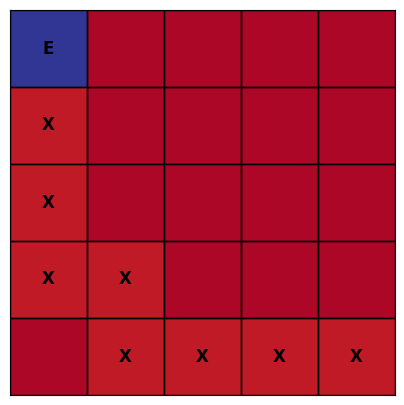

In [ ]:

rewarded_states=[]
draw_greedy_world_with_path(states_path,rewarded_states)


One of the key aspect of Q-learning is the exploration-exploitation tradeoff. During training, the agent needs to strike a balance between exploring new actions and exploiting the current knowledge to maximize its long-term reward.

The exploration-exploitation tradeoff is controlled by the epsilon-greedy policy, where the agent chooses to either explore or exploit based on a specified epsilon value. A high epsilon value encourages more exploration, while a low epsilon value promotes exploitation of the learned Q-values. The choice of epsilon influences the agent's behavior and can impact the number of states visited and the cumulative reward obtained during training.

Experiment Purpose: The purpose of this experiment is to investigate the effects of different epsilon values on the behavior of a Q-learning agent. By varying epsilon, we can observe how exploration and exploitation tradeoff influences the agent's learning process. Specifically, we will measure the number of states visited and the cumulative reward obtained for each epsilon value.

the Epsilom values that i am gonna use are .0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 and 1

For epsilon = 0.10, cumulative reward = 43
For epsilon = 0.10, number of states visited = 8
For epsilon = 0.20, cumulative reward = 43
For epsilon = 0.20, number of states visited = 8
For epsilon = 0.30, cumulative reward = 43
For epsilon = 0.30, number of states visited = 8
For epsilon = 0.40, cumulative reward = 43
For epsilon = 0.40, number of states visited = 8
For epsilon = 0.50, cumulative reward = 43
For epsilon = 0.50, number of states visited = 8
For epsilon = 0.60, cumulative reward = 43
For epsilon = 0.60, number of states visited = 8
For epsilon = 0.70, cumulative reward = 43
For epsilon = 0.70, number of states visited = 8
For epsilon = 0.80, cumulative reward = 43
For epsilon = 0.80, number of states visited = 8
For epsilon = 0.90, cumulative reward = 43
For epsilon = 0.90, number of states visited = 8
For epsilon = 1.00, cumulative reward = 43
For epsilon = 1.00, number of states visited = 8


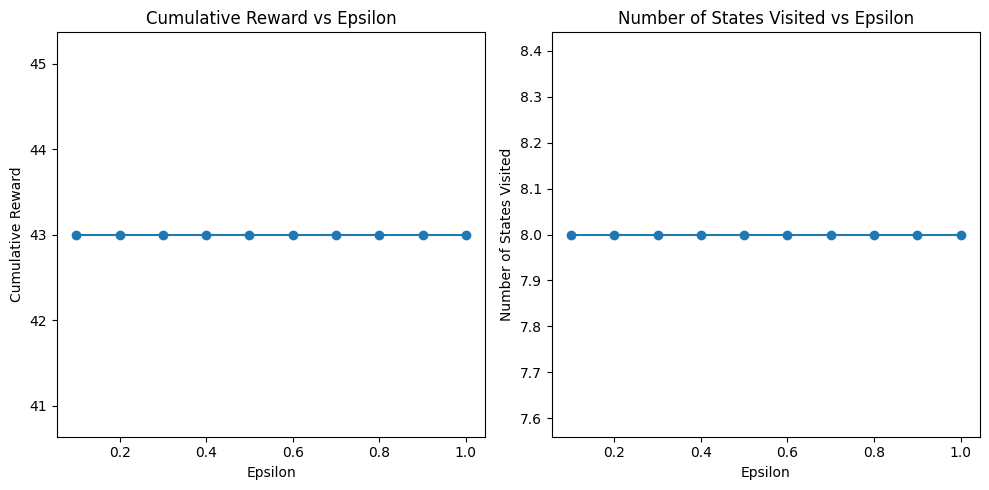

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.1, 1, 10)
reward_per_epsilon = []
nb_of_states_per_epsilon = []

for ep in epsilons:
    agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_states_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


For discount factor = 0.10, cumulative reward = 43
For discount factor = 0.10, number of states visited = 8
For discount factor = 0.20, cumulative reward = 43
For discount factor = 0.20, number of states visited = 8
For discount factor = 0.30, cumulative reward = 43
For discount factor = 0.30, number of states visited = 8
For discount factor = 0.40, cumulative reward = 43
For discount factor = 0.40, number of states visited = 8
For discount factor = 0.50, cumulative reward = 43
For discount factor = 0.50, number of states visited = 8
For discount factor = 0.60, cumulative reward = 43
For discount factor = 0.60, number of states visited = 8
For discount factor = 0.70, cumulative reward = 43
For discount factor = 0.70, number of states visited = 8
For discount factor = 0.80, cumulative reward = 43
For discount factor = 0.80, number of states visited = 8
For discount factor = 0.90, cumulative reward = 43
For discount factor = 0.90, number of states visited = 8
For discount factor = 1.00, 

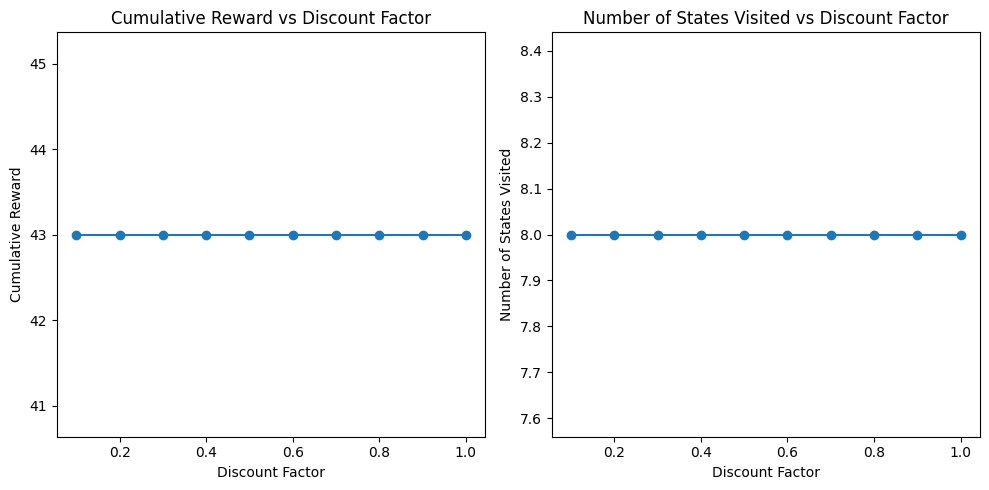

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 1, 10)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []

for factor in discount_factors:
    agent = QLearningAgent(env, learning_rate=0.1, discount_factor=factor, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_states_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


The discount factor (commonly denoted by γ) is a parameter used in reinforcement learning to balance immediate rewards versus future rewards. It determines the importance of future rewards relative to immediate rewards. A discount factor of 0 means that the agent only cares about immediate rewards, while a discount factor of 1 means that the agent values immediate and future rewards equally.

In a constant reward environment where all rewards are -1, the agent's goal is to complete the task as quickly as possible since the rewards are constant and negative.

For learning rate = 0.10, cumulative reward = 43
For learning rate = 0.10, number of states visited = 8
For learning rate = 0.20, cumulative reward = 43
For learning rate = 0.20, number of states visited = 8
For learning rate = 0.30, cumulative reward = 43
For learning rate = 0.30, number of states visited = 8
For learning rate = 0.40, cumulative reward = 43
For learning rate = 0.40, number of states visited = 8
For learning rate = 0.50, cumulative reward = 43
For learning rate = 0.50, number of states visited = 8
For learning rate = 0.60, cumulative reward = 43
For learning rate = 0.60, number of states visited = 8
For learning rate = 0.70, cumulative reward = 43
For learning rate = 0.70, number of states visited = 8
For learning rate = 0.80, cumulative reward = 43
For learning rate = 0.80, number of states visited = 8
For learning rate = 0.90, cumulative reward = 43
For learning rate = 0.90, number of states visited = 8
For learning rate = 1.00, cumulative reward = 43
For learning ra

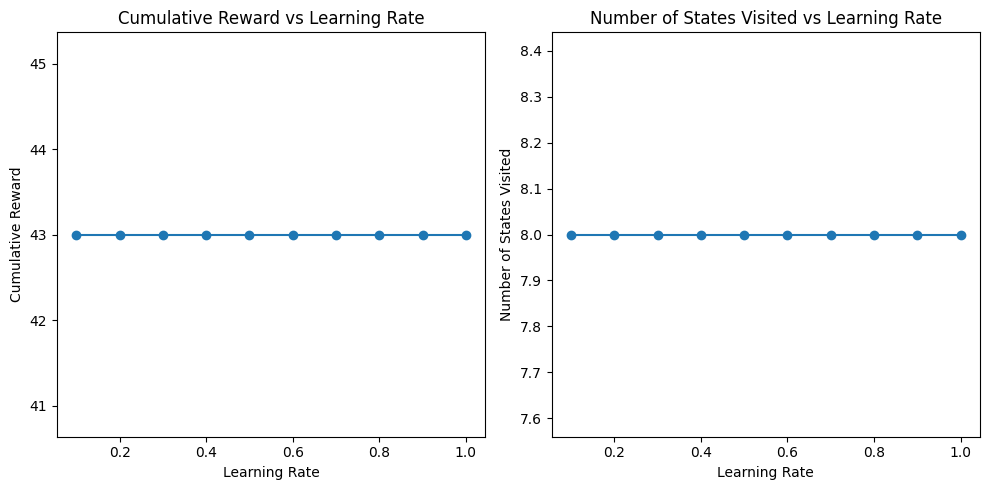

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []

for rate in learning_rates:
    agent = QLearningAgent(env, learning_rate=rate, discount_factor=0.6, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_states_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


In our grid world environment, we have set a reward of -1 for all actions, except for the exit state where the reward is 50. Q-learning updates the Q-values based on the observed rewards and transitions between states, allowing the agent to gradually learn the optimal policy.
When all rewards in the environment are set to -1, the agent is still reaching the optimal policy regardless of the learning rate value due to the simplicity and uniformity of the reward structure. In this case, the agent's objective is to minimize the number of steps or actions taken to complete a task.

Lets try to play with the Reward distribution:

In [ ]:
import numpy as np

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

# Set custom rewards for specific states
env.set_custom_reward((1, 1), 1)
env.set_custom_reward((0,2), 2)
env.set_custom_reward((0, 3), 1)
env.set_custom_reward((1, 0), 1)
env.set_custom_reward((4, 0), 1)
env.set_custom_reward((4, 3), 2)
env.set_custom_reward((4,2), 2)
env.set_custom_reward((1,4), 4)
env.set_custom_reward((1,3), 4)
# Create the Q-learning agent
agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=0.5)

# Train the agent
num_episodes = 10000
agent.train(num_episodes)

In [ ]:

reward_table = np.array([
    [50, -1,  2,  1, -1],
    [ 1, -1,  1,  4, -1],
    [ 1, -1, -1,  2, -1],
    [ 1, -1, -1, -1, -1],
    [-1, -1, -1,  2, -1]
])
print('reward distribution:')
print(reward_table)


reward distribution:
[[50 -1  2  1 -1]
 [ 1 -1  1  4 -1]
 [ 1 -1 -1  2 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1  2 -1]]


In [ ]:
states_path, action_path, reward, nb_actions, rewarded_states=agent.get_state_reward_path((4,4))
print('The optimal path to reach the exit is')
print(states_path)
print()
print('The total accumulated rewar folleing this path is ',reward)
print()
print('The actions that the agent made to reach the exit are ')
print(action_path)
print()
print('The number of actions leading to the exit is: ',nb_actions)
print()
print('Finally the number of rewarded actions taken by the optimal policy is: ',rewarded_states)

The optimal path to reach the exit is
[(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]

The total accumulated rewar folleing this path is  53

The actions that the agent made to reach the exit are 
['←', '←', '←', '←', '↑', '↑', '↑', '↑']

The number of actions leading to the exit is:  8

Finally the number of rewarded actions taken by the optimal policy is:  4


White are the rewarded state:



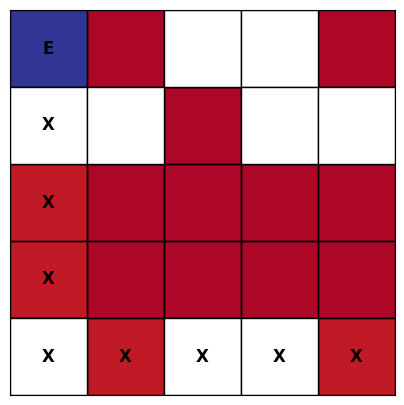

In [ ]:
print ("White are the rewarded state:")
print()

draw_greedy_world_with_path(states_path, env.custom_rewards)


For epsilon = 0.01, cumulative reward = 58
For epsilon = 0.01, The path taken is  = [(4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (0, 3), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.01, number of states visited = 8
For epsilon = 0.04, cumulative reward = 52
For epsilon = 0.04, The path taken is  = [(4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.04, number of states visited = 8
For epsilon = 0.08, cumulative reward = 56
For epsilon = 0.08, The path taken is  = [(4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.08, number of states visited = 8
For epsilon = 0.11, cumulative reward = 52
For epsilon = 0.11, The path taken is  = [(4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.11, number of states visited = 8
For epsilon = 0.15, cumulative reward = 53
For epsilon = 0.15, The path taken is  = [(4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (1, 1), (1, 0), (0, 0)]
For epsilon = 0.15,

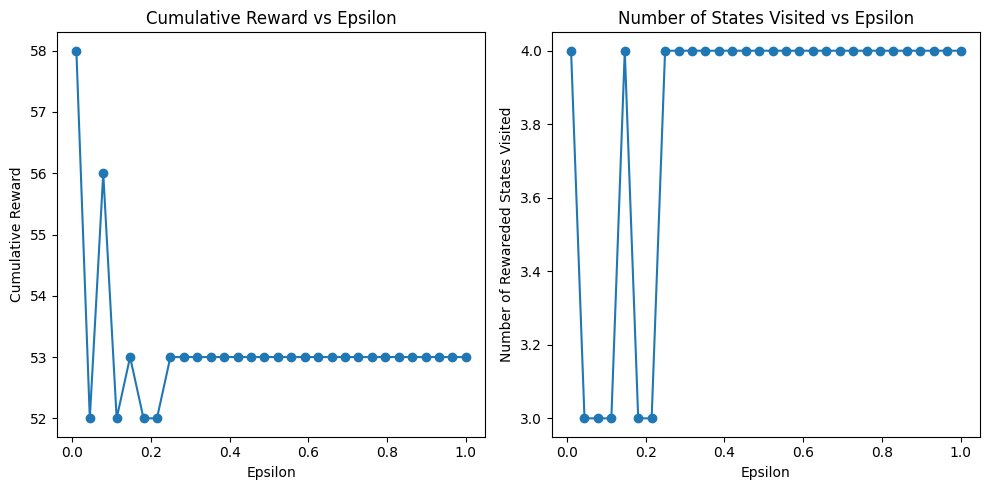

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.01, 1, 30)
reward_per_epsilon = []
nb_of_states_per_epsilon = []
nb_of_rewarded_per_epsilons = []
for ep in epsilons:
    agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    nb_of_rewarded_per_epsilons.append(rewarded_states)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, The path taken is  = {states_path}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_rewarded_per_epsilons, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of Rewareded States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


When epsilon is small ( 0.01), the agent primarily exploits the actions that have been deemed the most optimal based on its current knowledge. This can lead to the agent consistently choosing the actions it believes to be the best, resulting in finding the optimal path.

However, when epsilon is increased, the agent starts to explore more often. This exploration lead the agent to try different actions, including those that may not seem optimal based on its current knowledge. In some cases, exploration can lead the agent to discover better paths or actions that were initially overlooked. However, it can also lead the agent to choose suboptimal actions that hinder its performance.


Hence, in our case, increasing epsilon caused the agent to deviate from the optimal path because the Q-values had already converged, and additional exploration introduced unnecessary randomness that led to suboptimal decisions.

The agent is having troubles finiding the Exit
For discount factor = 0.10, cumulative reward = 20
For discount factor = 0.10, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.10, number of states visited = 10
The agent is having troubles finiding the Exit
For discount factor = 0.19, cumulative reward = 20
For discount factor = 0.19, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.19, number of states visited = 10
The agent is having troubles finiding the Exit
For discount factor = 0.28, cumulative reward = 20
For discount factor = 0.28, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.28, number of states visited = 10
The agent is having troubles finiding the Exit
For discount factor = 0.37, cumulative reward = 20
For discount factor 

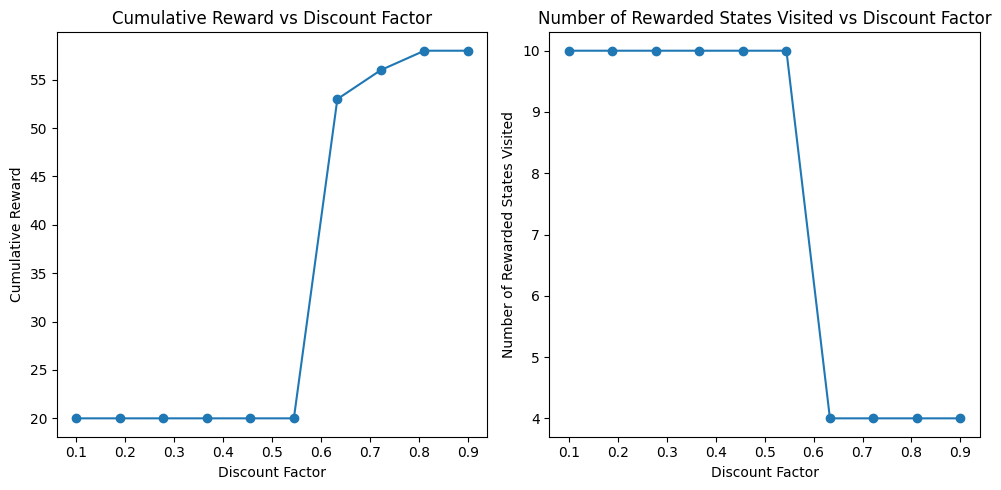

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 0.9, 10)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []
nb_of_rewarded_per_discount_factor = []
for factor in discount_factors:
    agent = QLearningAgent(env, learning_rate=0.2, discount_factor=factor, epsilon=0.2)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_rewarded_per_discount_factor.append(rewarded_states)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, The path taken is  = {states_path}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_rewarded_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


when the discount factor is small, the agent becomes myopic and prioritizes immediate rewards over long-term cumulative rewards. This lead to convergence to suboptimal policies, especially in scenarios where there are several rewarded states. Increasing the discount factor gives more weight to future rewards and allows the agent to converge to the optimal policy that maximizes cumulative rewards.

With a small discount factor, the agent may prioritize immediate rewards and keep visiting the rewarded states in a loop because it perceives them as the most promising options.specially if the epsilom value is also small.








For learning rate = 0.10, cumulative reward = 53
For learning rate = 0.10, The path taken is = [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
For learning rate = 0.10, number of states visited = 8
For learning rate = 0.20, cumulative reward = 53
For learning rate = 0.20, The path taken is = [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
For learning rate = 0.20, number of states visited = 8
For learning rate = 0.30, cumulative reward = 53
For learning rate = 0.30, The path taken is = [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
For learning rate = 0.30, number of states visited = 8
For learning rate = 0.40, cumulative reward = 53
For learning rate = 0.40, The path taken is = [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
For learning rate = 0.40, number of states visited = 8
For learning rate = 0.50, cumulative reward = 53
For learning rate = 0.50, The path taken is = [(4, 4), (4, 

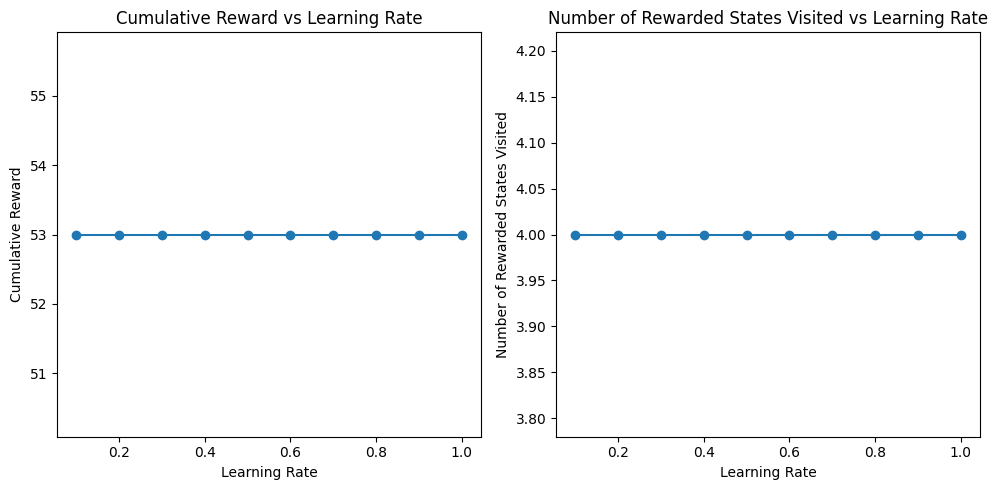

In [ ]:

import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []
nb_of_rewarded_per_learning_rate = []
for rate in learning_rates:
    agent = QLearningAgent(env, learning_rate=rate, discount_factor=0.6, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_rewarded_per_learning_rate.append(rewarded_states)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, The path taken is = {states_path}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_rewarded_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


What if we make the reward so messy

In [ ]:
import numpy as np

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

# Set custom rewards for specific states
env.set_custom_reward((1, 1), 3)
env.set_custom_reward((0,2), 3)
env.set_custom_reward((0, 4), 4)
env.set_custom_reward((1, 3), 2)
env.set_custom_reward((1, 0), 3)
env.set_custom_reward((2, 3), 2)
env.set_custom_reward((2,4), 2)
env.set_custom_reward((3,4), 4)
env.set_custom_reward((3,2), 4)
env.set_custom_reward((4,1), 4)
env.set_custom_reward((4,0), 4)
env.set_custom_reward((0,3), -2)
env.set_custom_reward((1,1), -2)
env.set_custom_reward((2,1), -2)
env.set_custom_reward((3,3), -2)
env.set_custom_reward((4,2), -2)
# Create the Q-learning agent
agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=0.5)

# Train the agent
num_episodes = 10000
agent.train(num_episodes)

Q-table (Episode 0):
[[[-10.         -10.         -10.         -10.        ]
  [-10.          -9.5688152  -10.          -8.65050605]
  [-10.          -9.37011933 -10.         -10.        ]
  [-10.          -8.12971639 -10.         -10.        ]
  [-10.          -4.51563727  -9.8        -10.        ]]

 [[  0.4        -10.         -10.         -10.        ]
  [ -8.89242122 -10.          -9.3         -9.688     ]
  [-10.         -10.          -9.17147286 -10.        ]
  [ -9.51471645  -8.78300212  -9.7         -7.04949323]
  [ -1.61774534  -8.79926675  -7.5427105  -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -8.06800144 -10.         -10.         -10.        ]
  [ -9.25777911 -10.          -9.36182869 -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [-10.         -10. 

In [ ]:
reward_table = np.array([
    [50, -1,  3, -2,  4],
    [ 3, -2,  3,  2, -1],
    [ 1, -2, -1,  2, -1],
    [ 1, -1, -1, -2,  4],
    [ 4,  4, -2,  2, -1]
])
print('Reward Distribution:')
print(reward_table)


Reward Distribution:
[[50 -1  3 -2  4]
 [ 3 -2  3  2 -1]
 [ 1 -2 -1  2 -1]
 [ 1 -1 -1 -2  4]
 [ 4  4 -2  2 -1]]


In [ ]:
states_path, action_path, reward, nb_actions, rewarded_states=agent.get_state_reward_path((4,4))
print('The optimal path to reach the exit is')
print(states_path)
print()
print('The total accumulated rewar folleing this path is ',reward)
print()
print('The actions that the agent made to reach the exit are ')
print(action_path)
print()
print('The number of actions leading to the exit is: ',nb_actions)
print()
print('Finally the number of rewarded actions taken by the optimal policy is: ',rewarded_states)

The optimal path to reach the exit is
[(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]

The total accumulated rewar folleing this path is  61

The actions that the agent made to reach the exit are 
['↑', '↑', '←', '↑', '←', '↑', '←', '←']

The number of actions leading to the exit is:  8

Finally the number of rewarded actions taken by the optimal policy is:  5


White are the rewarded state:



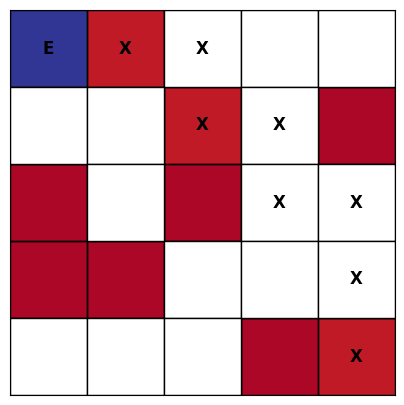

In [ ]:
print ("White are the rewarded state:")
print()

draw_greedy_world_with_path(states_path, env.custom_rewards)


For epsilon = 0.01, cumulative reward = 59
For epsilon = 0.01, The path taken is  = [(4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.01, number of states visited = 8
For epsilon = 0.04, cumulative reward = 61
For epsilon = 0.04, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.04, number of states visited = 8
For epsilon = 0.08, cumulative reward = 61
For epsilon = 0.08, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.08, number of states visited = 8
For epsilon = 0.11, cumulative reward = 61
For epsilon = 0.11, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.11, number of states visited = 8
For epsilon = 0.15, cumulative reward = 61
For epsilon = 0.15, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.15,

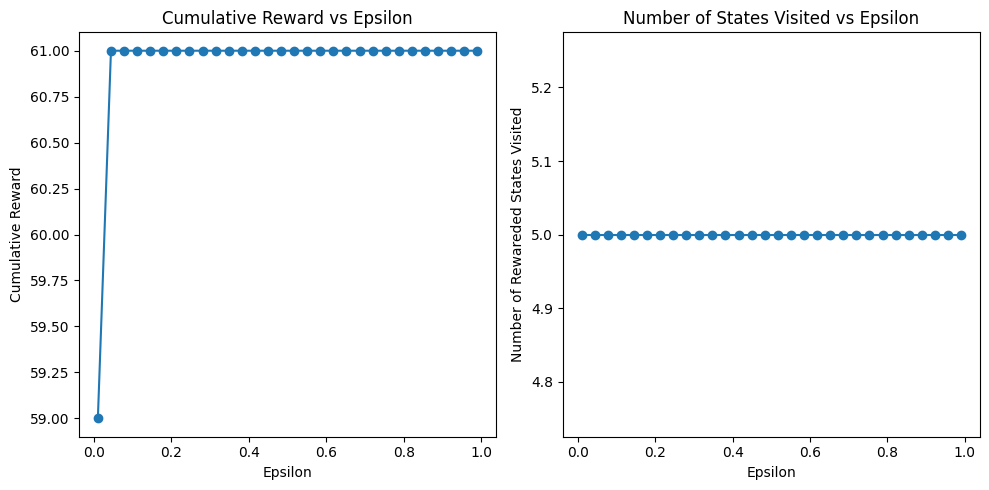

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.01, 0.99, 30)
reward_per_epsilon = []
nb_of_states_per_epsilon = []
nb_of_rewarded_per_epsilons = []
for ep in epsilons:
    agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    nb_of_rewarded_per_epsilons.append(rewarded_states)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, The path taken is  = {states_path}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_rewarded_per_epsilons, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of Rewareded States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


Even if there is no much difference because of the simplisity of the ENV, but at least we reached the desired proof, which is a smaller epsilom teds to converge to a suboptimal policy, as it happend when we set the epsilom was =   0.1 With a low exploration rate, the agent did not be explore enough to discover the optimal policy.

For discount factor = 0.10, cumulative reward = 10
For discount factor = 0.10, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4)]
For discount factor = 0.10, number of states visited = 3
For discount factor = 0.14, cumulative reward = 10
For discount factor = 0.14, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4)]
For discount factor = 0.14, number of states visited = 3
For discount factor = 0.18, cumulative reward = 10
For discount factor = 0.18, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4)]
For discount factor = 0.18, number of states visited = 3
For discount factor = 0.23, cumulative reward = 10
For discount factor = 0.23, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4)]
For discount factor = 0.23, number of states visited = 3
For discount factor = 0.27, cumulative reward = 10
For discount factor = 0.27, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4)]
For discount factor = 0.27, number of states visited = 3
For discount factor = 0.31, cumulative reward = 10

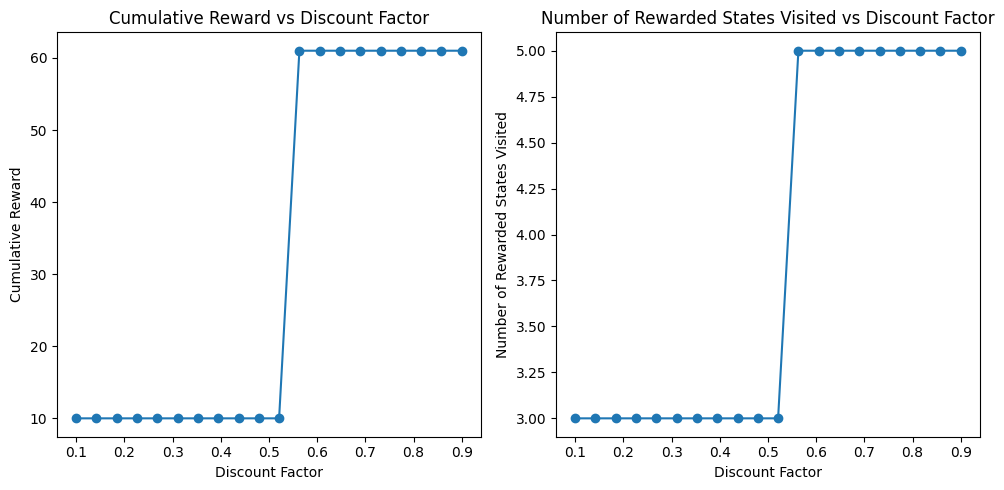

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 0.9, 20)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []
nb_of_rewarded_per_discount_factor = []
for factor in discount_factors:
    agent = QLearningAgent(env, learning_rate=0.1, discount_factor=factor, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_rewarded_per_discount_factor.append(rewarded_states)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, The path taken is  = {states_path}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_rewarded_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


Same problem as before, the agent is falling in a loop of taking immediate rewards while discount factor is small.

For learning rate = 0.10, cumulative reward = 61
For learning rate = 0.10, The path taken is = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.10, number of states visited = 8
For learning rate = 0.20, cumulative reward = 61
For learning rate = 0.20, The path taken is = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.20, number of states visited = 8
For learning rate = 0.30, cumulative reward = 61
For learning rate = 0.30, The path taken is = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.30, number of states visited = 8
For learning rate = 0.40, cumulative reward = 61
For learning rate = 0.40, The path taken is = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.40, number of states visited = 8
For learning rate = 0.50, cumulative reward = 61
For learning rate = 0.50, The path taken is = [(4, 4), (3, 

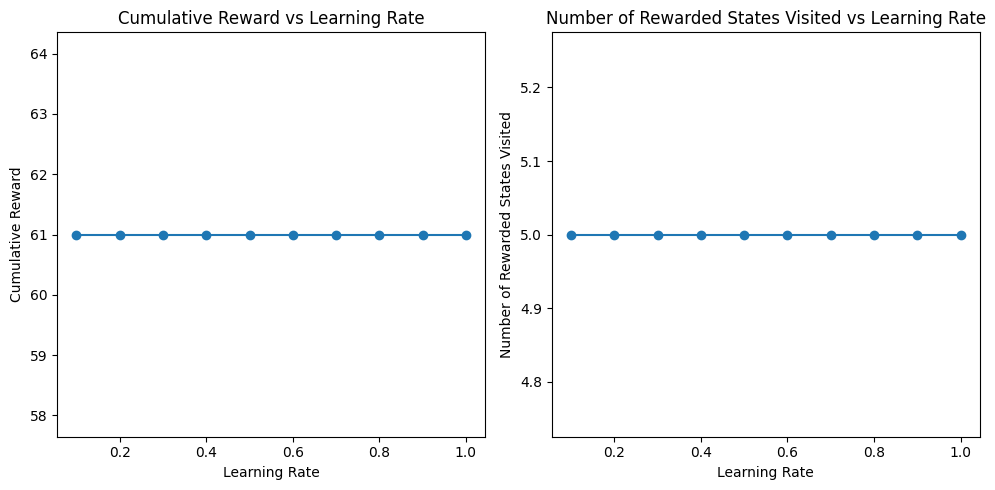

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []
nb_of_rewarded_per_learning_rate = []
for rate in learning_rates:
    agent = QLearningAgent(env, learning_rate=rate, discount_factor=0.6, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_rewarded_per_learning_rate.append(rewarded_states)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, The path taken is = {states_path}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_rewarded_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


Implementing SARSA algorithm

SARSA is an on-policy reinforcement learning algorithm that learns an optimal policy by iteratively updating action-value estimates (Q-values) based on observed rewards. It explores the environment using an epsilon-greedy strategy and updates Q-values using the SARSA update rule:

Q(s, a) ← Q(s, a) + α * (r + γ * Q(s', a') - Q(s, a))

The algorithm interacts with the environment in episodes, selecting actions based on the current policy. It balances exploration and exploitation by choosing random actions with probability epsilon and the action with the highest Q-value otherwise. By updating Q-values with rewards and estimated next-state Q-values, SARSA converges to an optimal action-value function representing maximum expected cumulative rewards for each state-action pair.

In [3]:

class SARSAAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.5, epsilon=0.1):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, len(env.actions)))-10

    def return_q_values(self, state):
        row, col = state
        q_values = self.q_table[row, col, :]
        return q_values

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random valid action
            valid_actions = []
            for i, action in enumerate(self.env.actions):
                if self.env.is_valid_action(action, state):
                    valid_actions.append(i)

            if len(valid_actions) > 0:
                action_index = np.random.choice(valid_actions)
            else:
                raise Exception('No available valid action')
        else:
            # Exploit: choose the action with the highest Q-value
            q_values = self.return_q_values(state)

            valid_actions = []
            for i, action in enumerate(self.env.actions):
                if self.env.is_valid_action(action, state):
                    valid_actions.append(i)

            if len(valid_actions) > 0:
                action_index = valid_actions[np.argmax(q_values[valid_actions])]

            else:
                raise Exception('No available valid action')

        return action_index

    def update_q_table(self, state, action, reward, next_state, next_action):
        current_q_value = self.q_table[state[0], state[1], action]
        next_q_value = self.q_table[next_state[0], next_state[1], next_action]
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * next_q_value - current_q_value)
        self.q_table[state[0], state[1], action] = new_q_value

    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.get_action(state)
            done = False
            while not done:
                next_state, reward, done = self.env.step(action)
                if next_state == (0, 0):
                    reward += 50  # Add reward for reaching the exit
                next_action = self.get_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

                '''
            if episode % 100 == 0 or episode == num_episodes - 1:
                print("Q-table (Episode {}):".format(episode))
                print(self.q_table)
                '''


    def get_optimal_policy(self, q_table):
        actions_mapping = {0: '↑', 1: '↓', 2: '←', 3: '→'}
        optimal_policy = np.empty((self.env.size, self.env.size), dtype=object)
        for i in range(self.env.size):
            for j in range(self.env.size):
                index = np.argmax(q_table[i, j, :])
                optimal_policy[i, j] = actions_mapping[index]
        optimal_policy[0, 0] = 'E'
        return optimal_policy

    def get_state_reward_path(self, state):
        policy = self.get_optimal_policy(self.q_table)
        action_path = []
        states_path = []
        reward = 0
        count = 0
        visited_states = set()
        rewarded_states = 0
        states_path.append(state)
        while state != (0, 0):
            if state in visited_states:
                count += 1
                if count > 7:
                    print("The agent is having troubles finding the Exit")
                    # Break the loop if the state has already been visited
                    break

            row, col = state
            optimal_action = policy[row, col]
            action_path.append(optimal_action)
            visited_states.add(state)

            if optimal_action == '↑':
                row -= 1
            elif optimal_action == '↓':
                row += 1
            elif optimal_action == '←':
                col -= 1
            elif optimal_action == '→':
                col += 1

            state = (row, col)
            states_path.append(state)

            if state == (0, 0):
                # Add exit reward if the agent reaches the exit state
                reward += 50
            elif state in self.env.custom_rewards:
                rewarded_states += 1
                reward += self.env.custom_rewards[state]
            else:
                reward += self.env.rewards['default']
        visited_states.add((0, 0))

        return states_path, action_path, reward, len(action_path), rewarded_states


In [ ]:
env = GreedyEnvironment()
sarsa_agent = SARSAAgent(env)
sarsa_agent.train(num_episodes=1000)
optimal_policy = sarsa_agent.get_optimal_policy(sarsa_agent.q_table)
states_path, action_path, total_reward, path_length, rewarded_states = sarsa_agent.get_state_reward_path((4, 4))

print("Optimal Policy:")
for row in optimal_policy:
    print(' | '.join(row))
    print('-' * (4 * env.size - 1))

print("\nPath Information:")
print("States Path:", states_path)
print("Action Path:", action_path)
print("Total Reward:", total_reward)
print("Path Length:", path_length)
print("Rewarded States:", rewarded_states)


Optimal Policy:
E | ← | ← | ← | ←
-------------------
↑ | ↑ | ↑ | ↑ | ↑
-------------------
↑ | ↑ | ↑ | ↑ | ↑
-------------------
↑ | ↑ | ↑ | ↑ | ↑
-------------------
↑ | ↑ | ↑ | ↑ | ↑
-------------------

Path Information:
States Path: [(4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
Action Path: ['↑', '↑', '↑', '↑', '←', '←', '←', '←']
Total Reward: 43
Path Length: 8
Rewarded States: 0


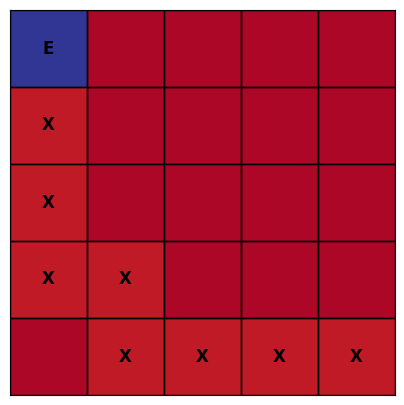

In [ ]:
rewarded_states=[]
draw_greedy_world_with_path(states_path,rewarded_states)


For epsilon = 0.10, cumulative reward = 43
For epsilon = 0.10, number of states visited = 8
For epsilon = 0.15, cumulative reward = 43
For epsilon = 0.15, number of states visited = 8
For epsilon = 0.19, cumulative reward = 43
For epsilon = 0.19, number of states visited = 8
For epsilon = 0.24, cumulative reward = 43
For epsilon = 0.24, number of states visited = 8
For epsilon = 0.29, cumulative reward = 43
For epsilon = 0.29, number of states visited = 8
For epsilon = 0.34, cumulative reward = 43
For epsilon = 0.34, number of states visited = 8
For epsilon = 0.38, cumulative reward = 43
For epsilon = 0.38, number of states visited = 8
For epsilon = 0.43, cumulative reward = 43
For epsilon = 0.43, number of states visited = 8
For epsilon = 0.48, cumulative reward = 43
For epsilon = 0.48, number of states visited = 8
For epsilon = 0.53, cumulative reward = 43
For epsilon = 0.53, number of states visited = 8
For epsilon = 0.57, cumulative reward = 43
For epsilon = 0.57, number of states 

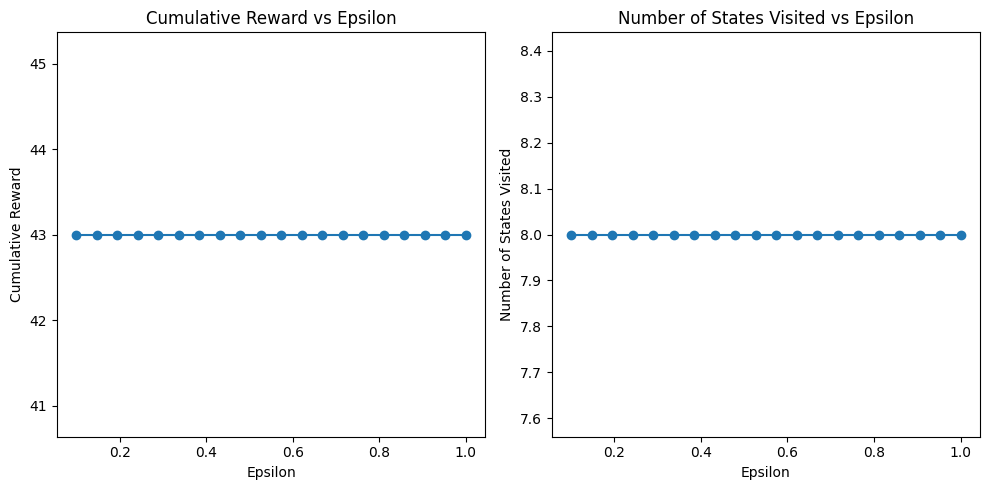

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.1, 1, 20)
reward_per_epsilon = []
nb_of_states_per_epsilon = []

for ep in epsilons:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_states_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


For discount factor = 0.10, cumulative reward = 43
For discount factor = 0.10, number of states visited = 8
For discount factor = 0.20, cumulative reward = 43
For discount factor = 0.20, number of states visited = 8
For discount factor = 0.30, cumulative reward = 43
For discount factor = 0.30, number of states visited = 8
For discount factor = 0.40, cumulative reward = 43
For discount factor = 0.40, number of states visited = 8
For discount factor = 0.50, cumulative reward = 43
For discount factor = 0.50, number of states visited = 8
For discount factor = 0.60, cumulative reward = 43
For discount factor = 0.60, number of states visited = 8
For discount factor = 0.70, cumulative reward = 43
For discount factor = 0.70, number of states visited = 8
For discount factor = 0.80, cumulative reward = 43
For discount factor = 0.80, number of states visited = 8
For discount factor = 0.90, cumulative reward = 43
For discount factor = 0.90, number of states visited = 8
For discount factor = 1.00, 

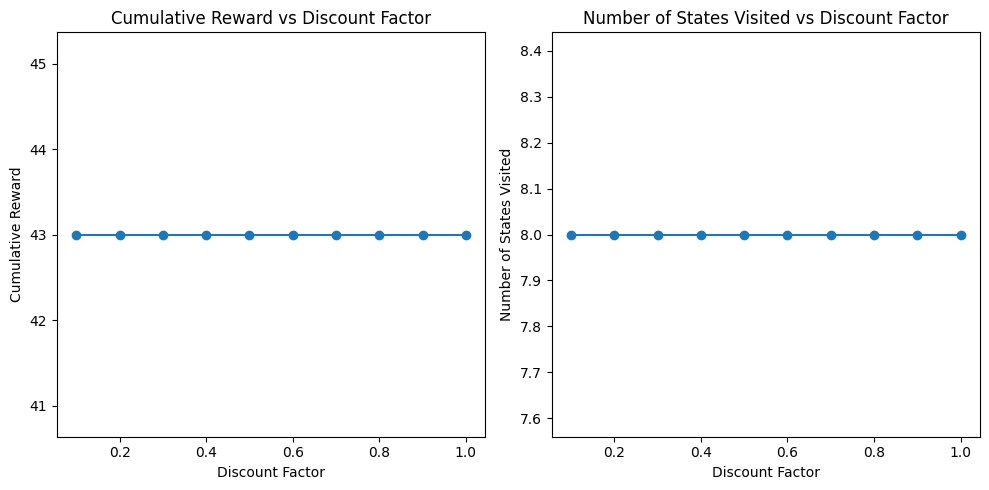

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 1, 10)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []

for factor in discount_factors:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=factor, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_states_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


For learning rate = 0.10, cumulative reward = 43
For learning rate = 0.10, number of states visited = 8
For learning rate = 0.20, cumulative reward = 43
For learning rate = 0.20, number of states visited = 8
For learning rate = 0.30, cumulative reward = 43
For learning rate = 0.30, number of states visited = 8
For learning rate = 0.40, cumulative reward = 43
For learning rate = 0.40, number of states visited = 8
For learning rate = 0.50, cumulative reward = 43
For learning rate = 0.50, number of states visited = 8
For learning rate = 0.60, cumulative reward = 43
For learning rate = 0.60, number of states visited = 8
The agent is having troubles finding the Exit
For learning rate = 0.70, cumulative reward = -12
For learning rate = 0.70, number of states visited = 12
The agent is having troubles finding the Exit
For learning rate = 0.80, cumulative reward = -11
For learning rate = 0.80, number of states visited = 11
The agent is having troubles finding the Exit
For learning rate = 0.90, 

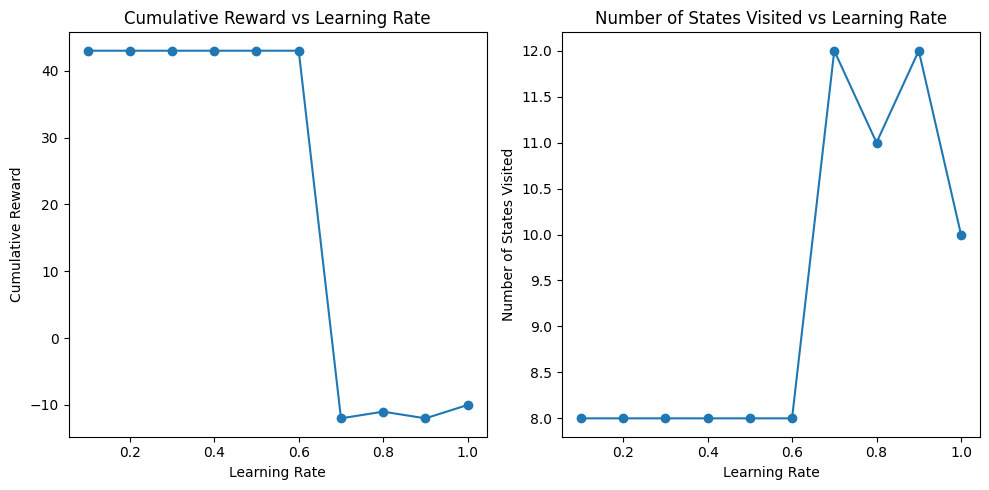

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []

for rate in learning_rates:
    agent = SARSAAgent(env, learning_rate=rate, discount_factor=0.6, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_states_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of States Visited')
plt.title('Number of States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


We can see taht the SARSA agent with learning rates between 0.1 and 0.6 achieved a cumulative reward of 43 and visited 8 states which is the optimal policy. However, it seems that the agent is having difficulties finding the exit beyond this range of learning rates.

The problem here is due to overshooting caused by a high learning rate. When the learning rate is too high, the updates to the Q-values become too large, leading to instability and difficulty in finding a convergence point.

To address this issue, i will try to increase the number of episodes during training. By providing more opportunities for the agent to explore and learn from the environment, we can increase the chances of convergence to an optimal policy.

Lets take the learning rate 0.8 as a case study since it is within the range of the problem
first lets run the code with the same number of episodes and see

In [ ]:
env = GreedyEnvironment()
sarsa_agent = SARSAAgent(env, learning_rate=0.8, discount_factor=0.6, epsilon=0.6)
sarsa_agent.train(num_episodes=1000)
optimal_policy = sarsa_agent.get_optimal_policy(sarsa_agent.q_table)
states_path, action_path, total_reward, path_length, rewarded_states = sarsa_agent.get_state_reward_path((4, 4))

print("Optimal Policy:")
for row in optimal_policy:
    print(' | '.join(row))
    print('-' * (4 * env.size - 1))

print("\nPath Information:")
print("States Path:", states_path)
print("Action Path:", action_path)
print("Total Reward:", total_reward)
print("Path Length:", path_length)
print("Rewarded States:", rewarded_states)


Q-table (Episode 0):
[[[-10.         -10.         -10.         -10.        ]
  [-10.          -6.97792    -10.          -7.6       ]
  [-10.         -10.          -7.6         -3.95357952]
  [-10.          -5.22114868 -10.          -3.13052413]
  [-10.          -4.65341927  -5.872      -10.        ]]

 [[ 73.2        -10.         -10.          -4.28417049]
  [ -5.190016    -4.26107     -4.33186959  -6.2176    ]
  [ -4.55466728  -4.59868672  -7.6        -10.        ]
  [ -4.44569838  -3.80660016  -5.872       -3.90403418]
  [ -2.73887235  -4.33925066  -5.56698882 -10.        ]]

 [[ -6.39762759 -10.         -10.         -10.        ]
  [ -4.5928192   -2.88666713  -7.6         -4.00447956]
  [ -4.83280384 -10.          -4.30085652  -3.32712123]
  [ -3.68794148  -7.6         -5.1771136   -6.26872505]
  [ -2.83861125  -7.6         -6.85995554 -10.        ]]

 [[ -3.84023007 -10.         -10.         -10.        ]
  [ -4.26807267 -10.          -7.6        -10.        ]
  [-10.          -7.6

the same problem, so let us now increase the number of episodes from 1000 to 10000

In [ ]:
env = GreedyEnvironment()
sarsa_agent = SARSAAgent(env, learning_rate=0.8, discount_factor=0.6, epsilon=0.6)
sarsa_agent.train(num_episodes=10000)
optimal_policy = sarsa_agent.get_optimal_policy(sarsa_agent.q_table)
states_path, action_path, total_reward, path_length, rewarded_states = sarsa_agent.get_state_reward_path((4, 4))

print("Optimal Policy:")
for row in optimal_policy:
    print(' | '.join(row))
    print('-' * (4 * env.size - 1))

print("\nPath Information:")
print("States Path:", states_path)
print("Action Path:", action_path)
print("Total Reward:", total_reward)
print("Path Length:", path_length)
print("Rewarded States:", rewarded_states)


Q-table (Episode 0):
[[[-10.         -10.         -10.         -10.        ]
  [-10.          -7.6         73.2        -10.        ]
  [-10.          -4.2259961   -7.6         -6.58384384]
  [-10.          -4.07918449  -5.0075392   -5.41504   ]
  [-10.         -10.          -5.396608   -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [ -7.6        -10.         -10.         -10.        ]
  [ -6.53624504  -5.5072     -10.         -10.        ]
  [ -4.82886554 -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -5.872      -10.         -10.         -10.        ]
  [-10.          -6.53776384 -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]]

 [[-10.         -10.         -10.         -10.        ]
  [-10.         -10.         -10.         -10.        ]
  [ -7.6        -10. 

Exactly as we proposed,Increasing the number of episodes in our SARSA training has helped solve the problem we were facing. By providing more training iterations, the agent has had more opportunities to explore and learn from the environment, resulting in improved convergence and performance.

In [ ]:
import numpy as np

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

# Set custom rewards for specific states
env.set_custom_reward((1, 1), 1)
env.set_custom_reward((0,2), 2)
env.set_custom_reward((0, 3), 1)
env.set_custom_reward((1, 0), 1)
env.set_custom_reward((4, 0), 1)
env.set_custom_reward((4, 3), 2)
env.set_custom_reward((4,2), 2)
env.set_custom_reward((1,4), 4)
env.set_custom_reward((1,3), 4)
# Create the Q-learning agent
agent = SARSAAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=0.5)

# Train the agent
num_episodes = 10000
agent.train(num_episodes)

In [ ]:

reward_table = np.array([
    [50, -1,  2,  1, -1],
    [ 1, -1,  1,  4, -1],
    [ 1, -1, -1,  2, -1],
    [ 1, -1, -1, -1, -1],
    [-1, -1, -1,  2, -1]
])
print('reward distribution:')
print(reward_table)


reward distribution:
[[50 -1  2  1 -1]
 [ 1 -1  1  4 -1]
 [ 1 -1 -1  2 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1  2 -1]]


In [ ]:
states_path, action_path, reward, nb_actions, rewarded_states=agent.get_state_reward_path((4,4))
print('The optimal path to reach the exit is')
print(states_path)
print()
print('The total accumulated rewar folleing this path is ',reward)
print()
print('The actions that the agent made to reach the exit are ')
print(action_path)
print()
print('The number of actions leading to the exit is: ',nb_actions)
print()
print('Finally the number of rewarded actions taken by the optimal policy is: ',rewarded_states)

The agent is having troubles finding the Exit
The optimal path to reach the exit is
[(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]

The total accumulated rewar folleing this path is  20

The actions that the agent made to reach the exit are 
['←', '←', '→', '←', '→', '←', '→', '←', '→', '←']

The number of actions leading to the exit is:  10

Finally the number of rewarded actions taken by the optimal policy is:  10


White are the rewarded state:



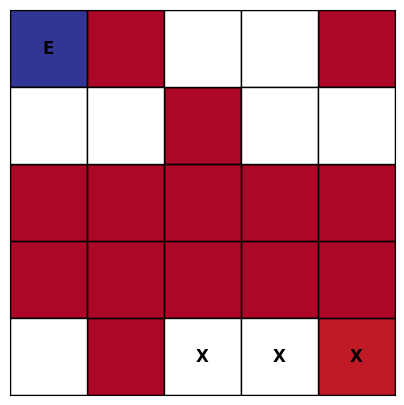

In [ ]:
print ("White are the rewarded state:")
print()
draw_greedy_world_with_path(states_path, env.custom_rewards)


For epsilon = 0.01, cumulative reward = 58
For epsilon = 0.01, The path taken is  = [(4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (0, 3), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.01, number of states visited = 8
For epsilon = 0.04, cumulative reward = 51
For epsilon = 0.04, The path taken is  = [(4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (1, 1), (0, 1), (0, 0)]
For epsilon = 0.04, number of states visited = 8
The agent is having troubles finding the Exit
For epsilon = 0.08, cumulative reward = 20
For epsilon = 0.08, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For epsilon = 0.08, number of states visited = 10
The agent is having troubles finding the Exit
For epsilon = 0.11, cumulative reward = 20
For epsilon = 0.11, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For epsilon = 0.11, number of states visited = 10
The agent is having troubles finding the Exit
For 

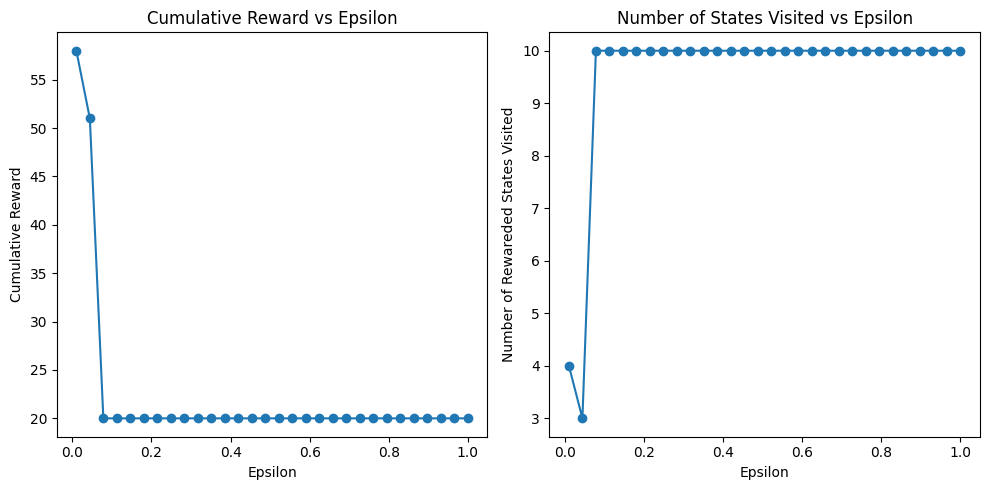

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.01, 1, 30)
reward_per_epsilon = []
nb_of_states_per_epsilon = []
nb_of_rewarded_per_epsilons = []
for ep in epsilons:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    nb_of_rewarded_per_epsilons.append(rewarded_states)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, The path taken is  = {states_path}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_rewarded_per_epsilons, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of Rewareded States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


The agent is having troubles finding the Exit
For discount factor = 0.10, cumulative reward = 20
For discount factor = 0.10, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.10, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.19, cumulative reward = 20
For discount factor = 0.19, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.19, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.28, cumulative reward = 20
For discount factor = 0.28, The path taken is  = [(4, 4), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2), (4, 3), (4, 2)]
For discount factor = 0.28, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.37, cumulative reward = 20
For discount factor = 0.

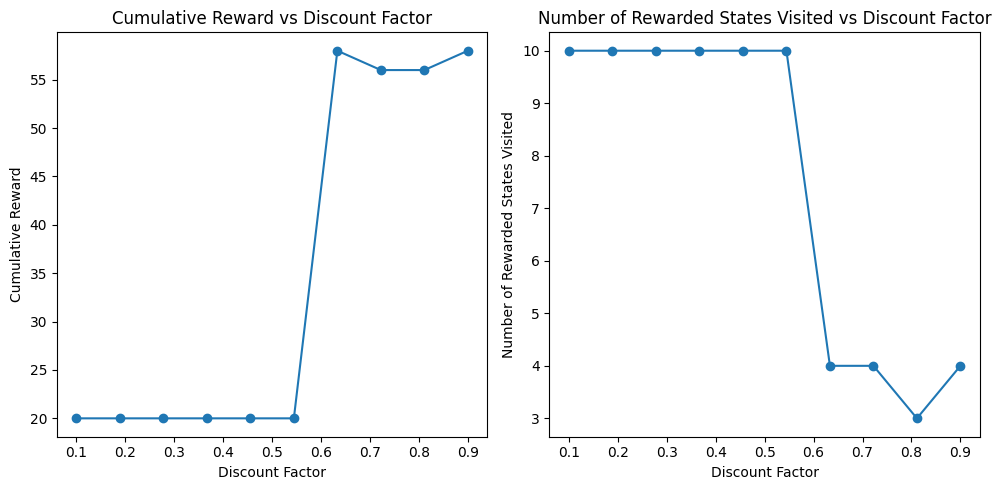

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 0.9, 10)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []
nb_of_rewarded_per_discount_factor = []
for factor in discount_factors:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=factor, epsilon=0.1)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_rewarded_per_discount_factor.append(rewarded_states)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, The path taken is  = {states_path}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_rewarded_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


The same problem that occured with The Q learning when the agent is failing when to find the exit and the optimal path, since we have added more rewarded states, and then the agent will consider them as local goals.

For learning rate = 0.10, cumulative reward = 56
For learning rate = 0.10, The path taken is = [(4, 4), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.10, number of states visited = 8
For learning rate = 0.20, cumulative reward = 56
For learning rate = 0.20, The path taken is = [(4, 4), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3), (0, 2), (0, 1), (0, 0)]
For learning rate = 0.20, number of states visited = 8
For learning rate = 0.30, cumulative reward = 53
For learning rate = 0.30, The path taken is = [(4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (1, 1), (1, 0), (0, 0)]
For learning rate = 0.30, number of states visited = 8
For learning rate = 0.40, cumulative reward = 53
For learning rate = 0.40, The path taken is = [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
For learning rate = 0.40, number of states visited = 8
For learning rate = 0.50, cumulative reward = 53
For learning rate = 0.50, The path taken is = [(4, 4), (4, 

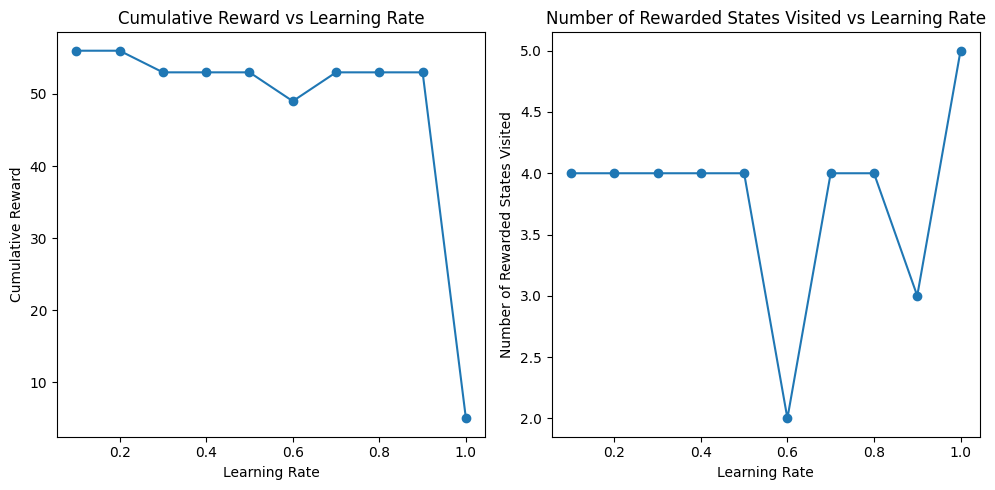

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []
nb_of_rewarded_per_learning_rate = []
for rate in learning_rates:
    agent = SARSAAgent(env, learning_rate=rate, discount_factor=0.7, epsilon=0.1)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_rewarded_per_learning_rate.append(rewarded_states)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, The path taken is = {states_path}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_rewarded_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


Messier REWARDS?

In [ ]:
import numpy as np

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

# Set custom rewards for specific states
env.set_custom_reward((1, 1), 3)
env.set_custom_reward((0,2), 3)
env.set_custom_reward((0, 4), 4)
env.set_custom_reward((1, 3), 2)
env.set_custom_reward((1, 0), 3)
env.set_custom_reward((2, 3), 2)
env.set_custom_reward((2,4), 2)
env.set_custom_reward((3,4), 4)
env.set_custom_reward((3,2), 4)
env.set_custom_reward((4,1), 4)
env.set_custom_reward((4,0), 4)
env.set_custom_reward((0,3), -2)
env.set_custom_reward((1,1), -2)
env.set_custom_reward((2,1), -2)
env.set_custom_reward((3,3), -2)
env.set_custom_reward((4,2), -2)
# Create the Q-learning agent
agent = SARSAAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=0.5)

# Train the agent
num_episodes = 10000
agent.train(num_episodes)

In [ ]:
reward_table = np.array([
    [50, -1,  3, -2,  4],
    [ 3, -2,  3,  2, -1],
    [ 1, -2, -1,  2, -1],
    [ 1, -1, -1, -2,  4],
    [ 4,  4, -2,  2, -1]
])
print('Reward Distribution:')
print(reward_table)


Reward Distribution:
[[50 -1  3 -2  4]
 [ 3 -2  3  2 -1]
 [ 1 -2 -1  2 -1]
 [ 1 -1 -1 -2  4]
 [ 4  4 -2  2 -1]]


In [ ]:
states_path, action_path, reward, nb_actions, rewarded_states=agent.get_state_reward_path((4,4))
print('The optimal path to reach the exit is')
print(states_path)
print()
print('The total accumulated rewar folleing this path is ',reward)
print()
print('The actions that the agent made to reach the exit are ')
print(action_path)
print()
print('The number of actions leading to the exit is: ',nb_actions)
print()
print('Finally the number of rewarded actions taken by the optimal policy is: ',rewarded_states)

The agent is having troubles finding the Exit
The optimal path to reach the exit is
[(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]

The total accumulated rewar folleing this path is  30

The actions that the agent made to reach the exit are 
['↑', '↑', '↓', '↑', '↓', '↑', '↓', '↑', '↓', '↑']

The number of actions leading to the exit is:  10

Finally the number of rewarded actions taken by the optimal policy is:  10


White are the rewarded state:



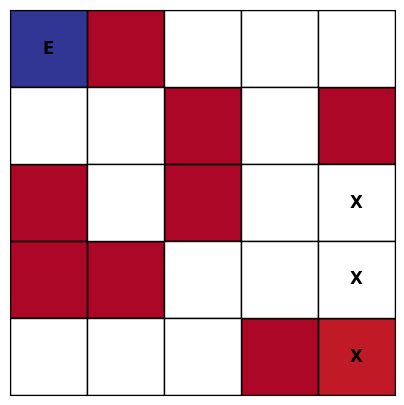

In [ ]:
print ("White are the rewarded state:")
print()
draw_greedy_world_with_path(states_path, env.custom_rewards)


For epsilon = 0.01, cumulative reward = 59
For epsilon = 0.01, The path taken is  = [(4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.01, number of states visited = 8
For epsilon = 0.04, cumulative reward = 60
For epsilon = 0.04, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.04, number of states visited = 8
For epsilon = 0.08, cumulative reward = 61
For epsilon = 0.08, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.08, number of states visited = 8
For epsilon = 0.11, cumulative reward = 61
For epsilon = 0.11, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.11, number of states visited = 8
For epsilon = 0.15, cumulative reward = 61
For epsilon = 0.15, The path taken is  = [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2), (0, 2), (0, 1), (0, 0)]
For epsilon = 0.15,

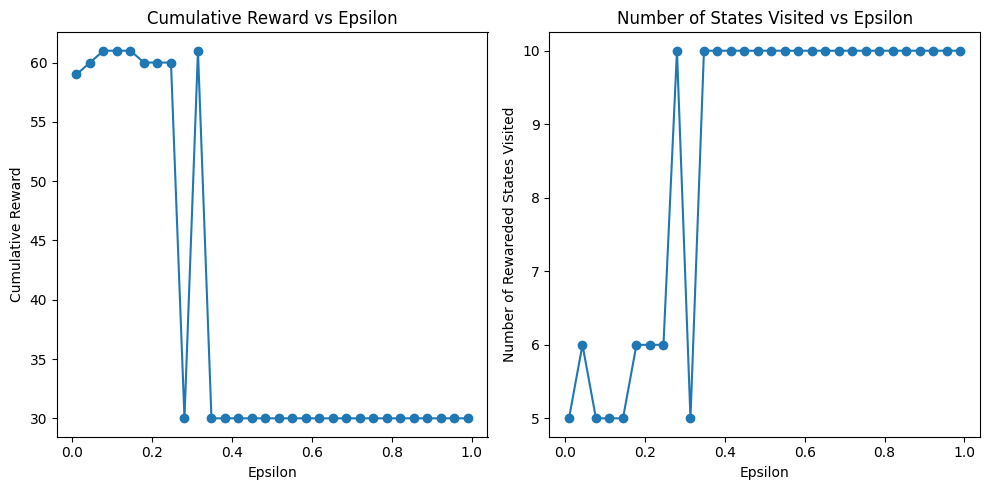

In [ ]:
import matplotlib.pyplot as plt

epsilons = np.linspace(0.01, 0.99, 30)
reward_per_epsilon = []
nb_of_states_per_epsilon = []
nb_of_rewarded_per_epsilons = []
for ep in epsilons:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=0.6, epsilon=ep)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_epsilon.append(reward)
    nb_of_states_per_epsilon.append(nb_actions)
    nb_of_rewarded_per_epsilons.append(rewarded_states)
    print(f"For epsilon = {ep:.2f}, cumulative reward = {reward}")
    print(f"For epsilon = {ep:.2f}, The path taken is  = {states_path}")
    print(f"For epsilon = {ep:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilons, reward_per_epsilon, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Epsilon')

plt.subplot(1, 2, 2)
plt.plot(epsilons, nb_of_rewarded_per_epsilons, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Number of Rewareded States Visited')
plt.title('Number of States Visited vs Epsilon')

plt.tight_layout()
plt.show()


The agent is having troubles finding the Exit
For discount factor = 0.10, cumulative reward = 30
For discount factor = 0.10, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For discount factor = 0.10, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.14, cumulative reward = 30
For discount factor = 0.14, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For discount factor = 0.14, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.18, cumulative reward = 30
For discount factor = 0.18, The path taken is  = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For discount factor = 0.18, number of states visited = 10
The agent is having troubles finding the Exit
For discount factor = 0.23, cumulative reward = 30
For discount factor = 0.

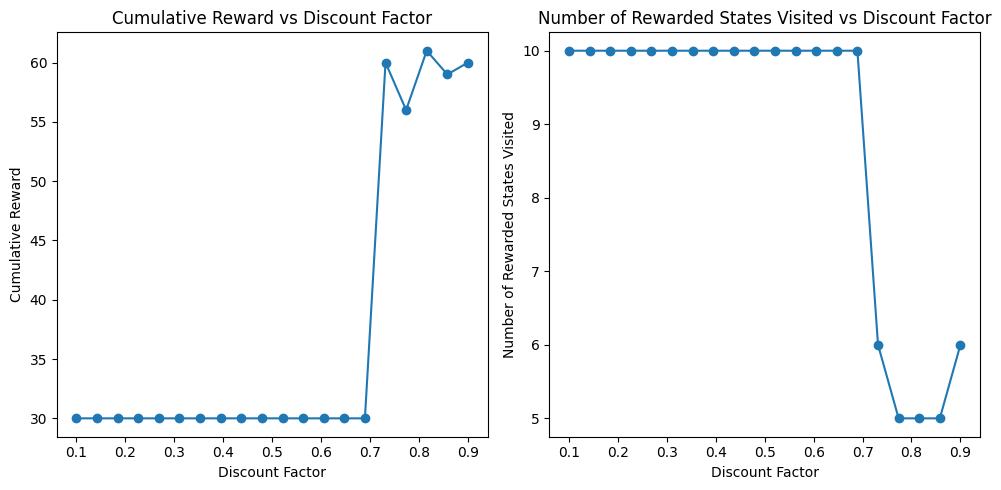

In [ ]:
import matplotlib.pyplot as plt

discount_factors = np.linspace(0.1, 0.9, 20)
reward_per_discount_factor = []
nb_of_states_per_discount_factor = []
nb_of_rewarded_per_discount_factor = []
for factor in discount_factors:
    agent = SARSAAgent(env, learning_rate=0.1, discount_factor=factor, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_discount_factor.append(reward)
    nb_of_rewarded_per_discount_factor.append(rewarded_states)
    nb_of_states_per_discount_factor.append(nb_actions)
    print(f"For discount factor = {factor:.2f}, cumulative reward = {reward}")
    print(f"For discount factor = {factor:.2f}, The path taken is  = {states_path}")
    print(f"For discount factor = {factor:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(discount_factors, reward_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Discount Factor')

plt.subplot(1, 2, 2)
plt.plot(discount_factors, nb_of_rewarded_per_discount_factor, marker='o')
plt.xlabel('Discount Factor')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Discount Factor')

plt.tight_layout()
plt.show()


The agent is having troubles finding the Exit
For learning rate = 0.10, cumulative reward = 30
For learning rate = 0.10, The path taken is = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For learning rate = 0.10, number of states visited = 10
The agent is having troubles finding the Exit
For learning rate = 0.20, cumulative reward = 30
For learning rate = 0.20, The path taken is = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For learning rate = 0.20, number of states visited = 10
The agent is having troubles finding the Exit
For learning rate = 0.30, cumulative reward = 30
For learning rate = 0.30, The path taken is = [(4, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4), (3, 4), (2, 4)]
For learning rate = 0.30, number of states visited = 10
The agent is having troubles finding the Exit
For learning rate = 0.40, cumulative reward = 30
For learning rate = 0.40, The path taken is = [

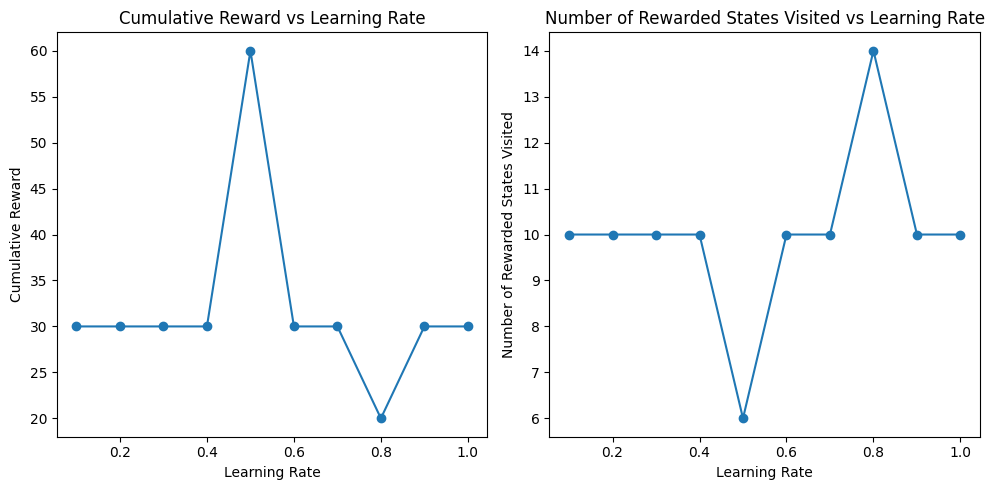

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.linspace(0.1, 1, 10)
reward_per_learning_rate = []
nb_of_states_per_learning_rate = []
nb_of_rewarded_per_learning_rate = []
for rate in learning_rates:
    agent = SARSAAgent(env, learning_rate=rate, discount_factor=0.6, epsilon=0.6)
    num_episodes = 5000
    agent.train(num_episodes)
    states_path, action_path, reward, nb_actions, rewarded_states = agent.get_state_reward_path((4, 4))
    reward_per_learning_rate.append(reward)
    nb_of_rewarded_per_learning_rate.append(rewarded_states)
    nb_of_states_per_learning_rate.append(nb_actions)
    print(f"For learning rate = {rate:.2f}, cumulative reward = {reward}")
    print(f"For learning rate = {rate:.2f}, The path taken is = {states_path}")
    print(f"For learning rate = {rate:.2f}, number of states visited = {nb_actions}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, reward_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Learning Rate')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, nb_of_rewarded_per_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Rewarded States Visited')
plt.title('Number of Rewarded States Visited vs Learning Rate')

plt.tight_layout()
plt.show()


Qlearning vs SARSA **comparison**

I have observed that the SARSA agent's performance is highly dependent on the choice of hyperparameters, even in a simple environment. This observation highlights a key difference between SARSA and Q-learning.

Q-learning is an off-policy algorithm that updates the Q-values based on the maximum Q-value of the next state, regardless of the action taken. This decoupling of the action selection from the Q-value updates allows Q-learning to be more robust to the choice of hyperparameters. It can converge to an optimal policy regardless of the exploration-exploitation trade-off or the learning rate.

On the other hand, SARSA is an on-policy algorithm that updates the Q-values based on the action actually taken in the next state. This means that the choice of action during training directly influences the Q-value updates. As a result, SARSA can be more sensitive to the exploration-exploitation balance and the learning rate.

In our experiments, we observed that increasing the number of episodes helped the SARSA agent converge and perform better. This suggests that the agent required more exploration and learning experiences to find an optimal policy. The high dependence on hyperparameters could be due to the agent's sensitivity to the exploration rate, learning rate, and discount factor.

Finally Based on the observations and experiments that we run, it appears that Q-learning is a better algorithm for this project.

In [4]:

# Create the environment
env = GreedyEnvironment(size=5, initial_position=(4, 4))

# Set custom rewards for specific states
env.set_custom_reward((1, 1), 1)
env.set_custom_reward((0,2), 2)
env.set_custom_reward((0, 3), 1)
env.set_custom_reward((1, 0), 1)
env.set_custom_reward((4, 0), 1)
env.set_custom_reward((4, 3), 2)
env.set_custom_reward((4,2), 2)
env.set_custom_reward((1,4), 4)
env.set_custom_reward((1,3), 4)

The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having troubles finiding the Exit
The agent is having troubles finding the Exit
The agent is having tro

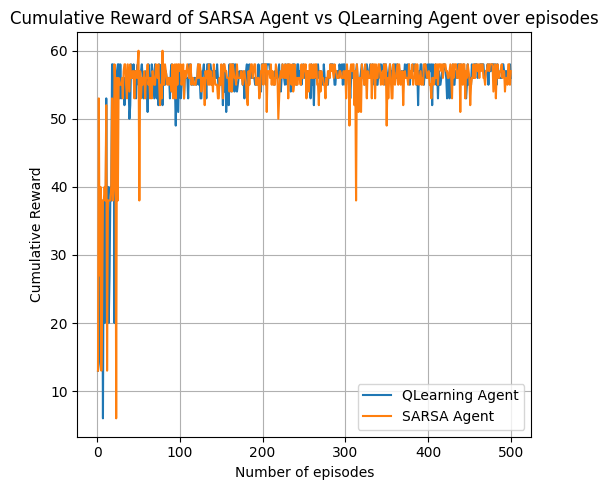

In [6]:
episodes = np.linspace(1, 500, 500)
reward_qlearning = []
reward_sarsa = []
import matplotlib.pyplot as plt

for i in episodes:
    Sagent = SARSAAgent(env,learning_rate=0.2, discount_factor=0.9, epsilon=0.2)
    Qagent = QLearningAgent(env,learning_rate=0.2, discount_factor=0.9, epsilon=0.2)
    Qagent.train(int(i))
    Sagent.train(int(i))
    Qstates_path, Qaction_path, Qreward, Qnb_actions, Qrewarded_states = Qagent.get_state_reward_path((4, 4))
    Sstates_path, Saction_path, Sreward, Snb_actions, Srewarded_states = Sagent.get_state_reward_path((4, 4))
    reward_qlearning.append(Qreward)
    reward_sarsa.append(Sreward)


# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(episodes, reward_qlearning, linestyle='-', label='QLearning Agent')
plt.plot(episodes, reward_sarsa, linestyle='-', label='SARSA Agent')
plt.xlabel('Number of episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of SARSA Agent vs QLearning Agent over episodes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()